In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset
heart_data = pd.read_csv('HeartDisease.csv')

In [16]:
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

In [17]:
heart_data.columns = column_names

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   63.0    302 non-null    float64
 1   1.0     302 non-null    float64
 2   1.0.1   302 non-null    float64
 3   145.0   302 non-null    float64
 4   233.0   302 non-null    float64
 5   1.0.2   302 non-null    float64
 6   2.0     302 non-null    float64
 7   150.0   302 non-null    float64
 8   0.0     302 non-null    float64
 9   2.3     302 non-null    float64
 10  3.0     302 non-null    float64
 11  0.0.1   302 non-null    object 
 12  6.0     302 non-null    object 
 13  0       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


C:\Users\kat92\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.23      0.33      0.27         9
           2       0.25      0.12      0.17         8
           3       0.25      0.22      0.24         9
           4       0.00      0.00      0.00         3

    accuracy                           0.56        61
   macro avg       0.32      0.31      0.31        61
weighted avg       0.55      0.56      0.55        61



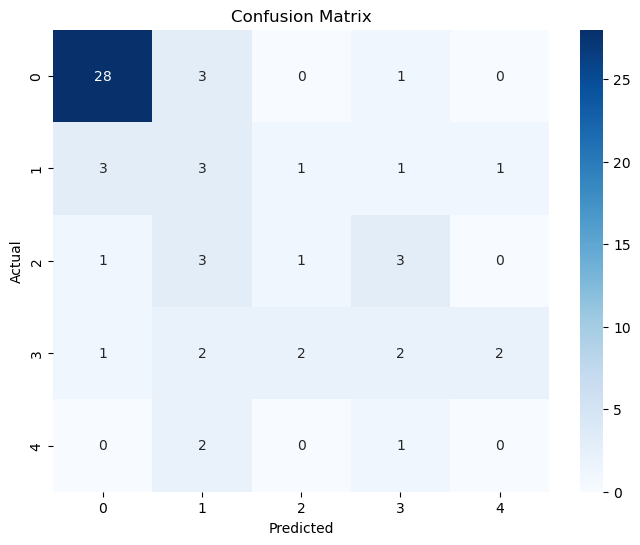

C:\Users\kat92\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kat92\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Feature Removal Results (sorted by accuracy):
Removing sex -> Accuracy: 0.59
Removing slope -> Accuracy: 0.59
Removing ca -> Accuracy: 0.59
Removing age -> Accuracy: 0.57
Removing cp -> Accuracy: 0.57
Removing trestbps -> Accuracy: 0.57
Removing chol -> Accuracy: 0.57
Removing fbs -> Accuracy: 0.57
Removing thalach -> Accuracy: 0.57
Removing exang -> Accuracy: 0.56
Removing restecg -> Accuracy: 0.54
Removing oldpeak -> Accuracy: 0.54
Removing thal -> Accuracy: 0.51


C:\Users\kat92\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
heart_data['ca'] = heart_data['ca'].replace('?', pd.NA)
heart_data['thal'] = heart_data['thal'].replace('?', pd.NA)

# Convert 'ca' and 'thal' columns to numeric (they were object types)
heart_data['ca'] = pd.to_numeric(heart_data['ca'], errors='coerce')
heart_data['thal'] = pd.to_numeric(heart_data['thal'], errors='coerce')

# Handle missing values for 'ca' and 'thal' by imputing the mean
imputer = SimpleImputer(strategy='mean')
heart_data[['ca', 'thal']] = imputer.fit_transform(heart_data[['ca', 'thal']])

# Split data into features (X) and target (y)
X = heart_data.drop(columns='target')
y = heart_data['target']

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

# Visualizing classification results with a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature removal experimentation
def evaluate_feature_removal(features_to_remove):
    X_new = X.drop(columns=features_to_remove)
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)
    
    model_new = LogisticRegression(max_iter=1000)
    model_new.fit(X_train_new, y_train_new)
    
    y_pred_new = model_new.predict(X_test_new)
    new_accuracy = accuracy_score(y_test_new, y_pred_new)
    
    return new_accuracy

# Test removal of individual features and print the results
features = X.columns
feature_removal_results = {feature: evaluate_feature_removal([feature]) for feature in features}

# Sorting results to find which feature removal improves accuracy
sorted_removal_results = sorted(feature_removal_results.items(), key=lambda x: x[1], reverse=True)

print("\nFeature Removal Results (sorted by accuracy):")
for feature, acc in sorted_removal_results:
    print(f"Removing {feature} -> Accuracy: {acc:.2f}")